# 数据可视化作业题目

In [1]:
# !pip install matplotlib
# !pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [3]:
data = sns.load_dataset("flights", data_home="flights.csv")
data.head()
# 年份，月份，乘客数

# import pandas as pd
# # 请将文件路径替换为实际文件路径
# file_path = "data/flights.csv"
# data = pd.read_csv(file_path)
# data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


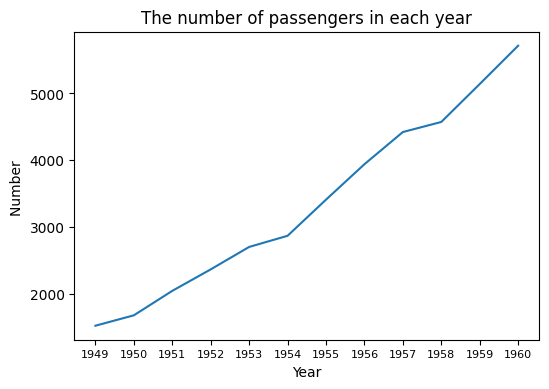

/tmp/ipykernel_701/1139371366.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_passengers = data.groupby('month')['passengers'].sum()


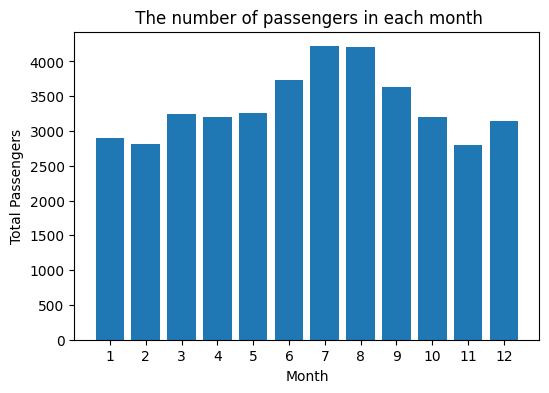

In [4]:
# 1. 分析年度乘客总量的变化情况（提示：折线图）
yearly_passengers = data.groupby('year')['passengers'].sum()

plt.figure(figsize=(6, 4))
# plt.subplot(1, 2, 1)
plt.plot(yearly_passengers.index, yearly_passengers.values, marker='')
plt.title('The number of passengers in each year')
plt.xlabel('Year')
plt.ylabel('Number ')
plt.xticks(yearly_passengers.index, fontsize=8)
# plt.grid(True)
plt.show()


# 2. 分析乘客量在一年中12个月份的分布（提示：柱状图）
monthly_passengers = data.groupby('month')['passengers'].sum()
# 对月份进行排序
sorted_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_passengers = monthly_passengers.reindex(sorted_months)

plt.figure(figsize=(6, 4))
# plt.subplot(1, 2,2)
plt.bar(monthly_passengers.index, monthly_passengers.values)
plt.title(' The number of passengers in each month')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(monthly_passengers.index, labels=range(1, 13))
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [27]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


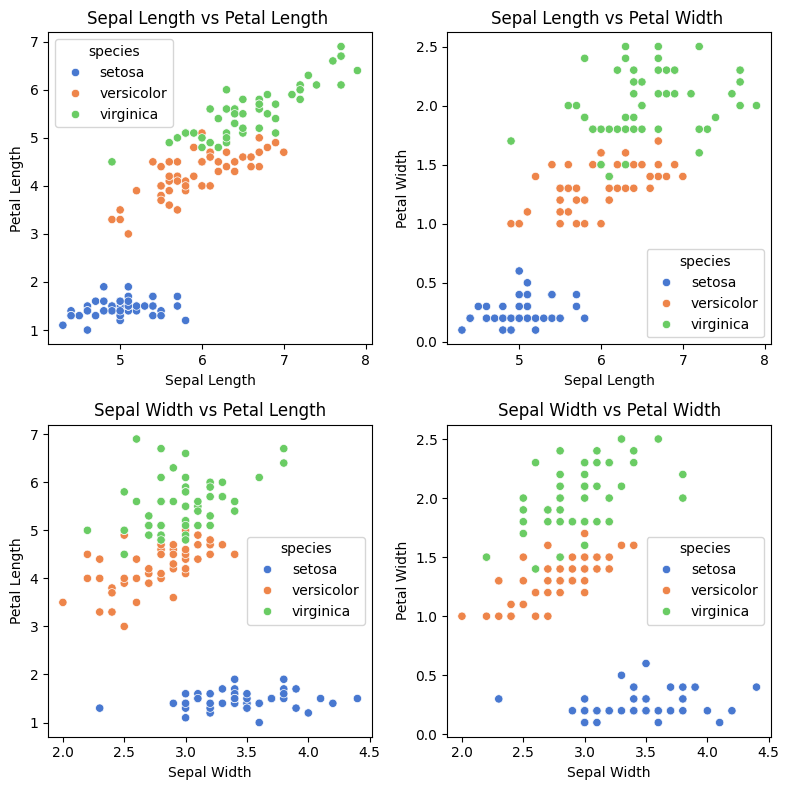

In [28]:
# 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

# 设置画布大小
plt.figure(figsize=(8, 8))

sns.color_palette("Paired")
# 散点图颜色
custom_palette = "muted"
# 第一个图：sepal_length VS petal_length
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=data,palette=custom_palette)
plt.title('Sepal Length vs Petal Length ')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
# 第二个图：sepal_length VS petal_width
plt.subplot(2, 2, 2)
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=data, palette=custom_palette)
plt.title('Sepal Length vs Petal Width ')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
# 第三个图：sepal_width VS petal_length
plt.subplot(2, 2, 3)
sns.scatterplot(x='sepal_width', y='petal_length', hue='species', data=data, palette=custom_palette)
plt.title('Sepal Width vs Petal Length')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
# 第四个图：sepal_width VS petal_width
plt.subplot(2, 2, 4)
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=data, palette=custom_palette)
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# 调整子图之间的距离
plt.tight_layout()
# 显示图形
plt.show()



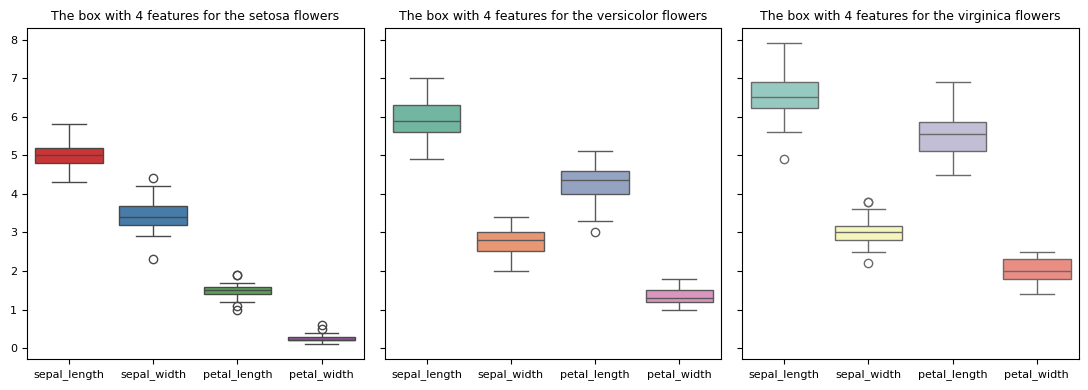

In [29]:
# 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

# 箱图

# 创建一个包含3个子图的大图
fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharey=True)

# 绘制setosa花的箱图
sns.boxplot(ax=axes[0], data=data[data['species'] == 'setosa'], palette='Set1')
axes[0].set_title('The box with 4 features for the setosa flowers',size=9) 
axes[0].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 绘制versicolor花的箱图
sns.boxplot(ax=axes[1], data=data[data['species'] == 'versicolor'], palette='Set2')
axes[1].set_title('The box with 4 features for the versicolor flowers',size=9) 
axes[1].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 绘制virginica花的箱图
sns.boxplot(ax=axes[2], data=data[data['species'] == 'virginica'], palette='Set3')
axes[2].set_title('The box with 4 features for the virginica flowers',size=9) 
axes[2].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()


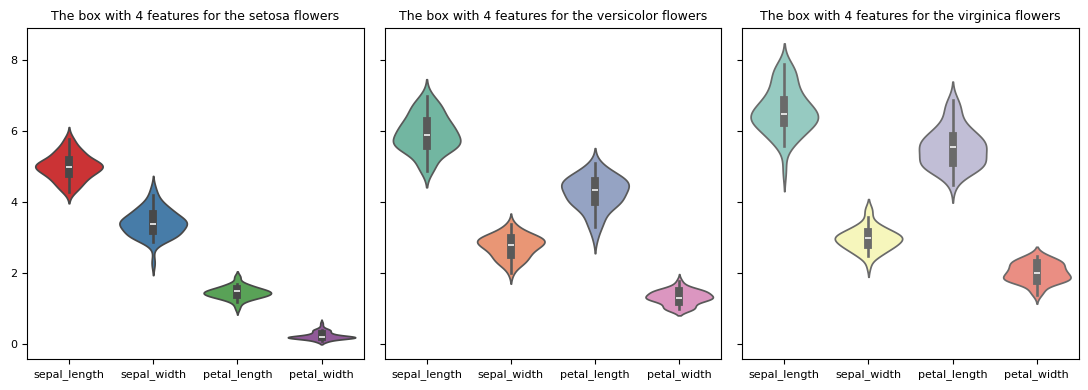

In [30]:
# 提琴图

# 创建一个包含3个子图的大图
fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharey=True)

# 绘制setosa花的箱图
sns.violinplot(ax=axes[0], data=data[data['species'] == 'setosa'], palette='Set1')
axes[0].set_title('The box with 4 features for the setosa flowers',size=9) 
axes[0].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 绘制versicolor花的箱图
sns.violinplot(ax=axes[1], data=data[data['species'] == 'versicolor'], palette='Set2')
axes[1].set_title('The box with 4 features for the versicolor flowers',size=9) 
axes[1].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 绘制virginica花的箱图
sns.violinplot(ax=axes[2], data=data[data['species'] == 'virginica'], palette='Set3')
axes[2].set_title('The box with 4 features for the virginica flowers',size=9) 
axes[2].tick_params(axis='both', labelsize=8)  # 调整刻度字体大小

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()


In [72]:
# # 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

# # 设置图形大小
# plt.figure(figsize=(5,5))

# # 绘制六角箱图
# sns.boxenplot(x="species", y="sepal_length", data=data,hue="species", palette="tab10",width=0.3)
# sns.boxenplot(x="species", y="sepal_width", data=data,hue="species", palette="tab10",width=0.3)
# sns.boxenplot(x="species", y="petal_length", data=data ,hue="species", palette="tab10",width=0.3)
# sns.boxenplot(x="species", y="petal_width", data=data ,hue="species", palette="tab10",width=0.3)

# # 添加标题和标签
# plt.title("Distribution of Sepal and Petal Sizes by Iris Species", fontdict={'fontsize': 9})
# plt.xlabel("Species")
# plt.ylabel("Size")
# # 显示图形
# plt.show()




<Figure size 400x300 with 0 Axes>

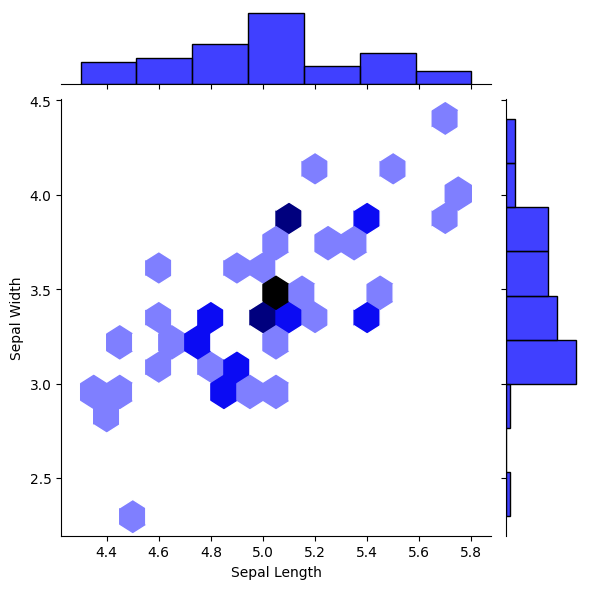

<Figure size 400x300 with 0 Axes>

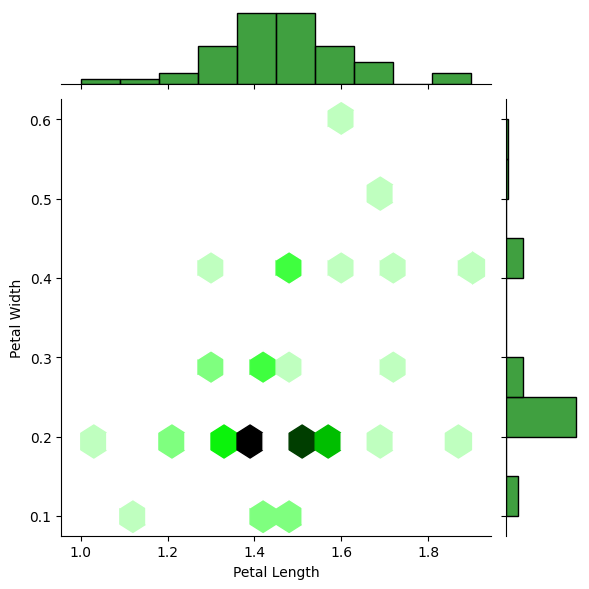

<Figure size 400x300 with 0 Axes>

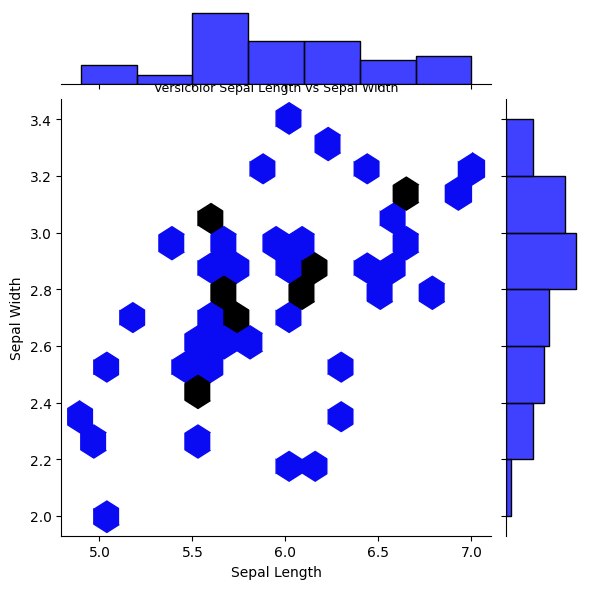

<Figure size 400x300 with 0 Axes>

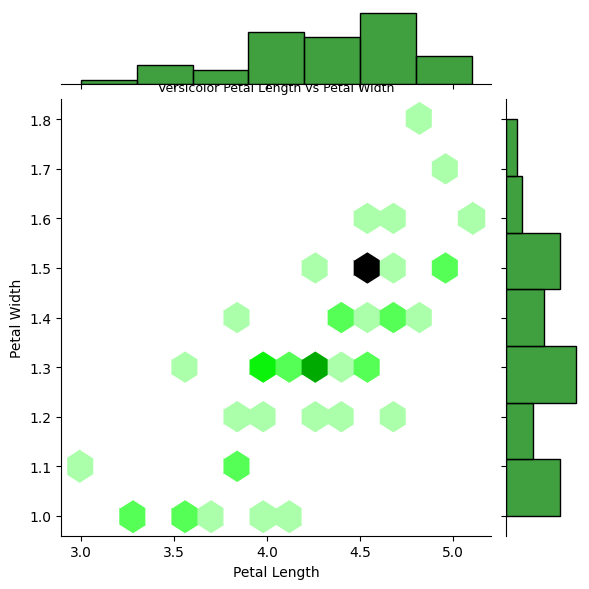

<Figure size 400x300 with 0 Axes>

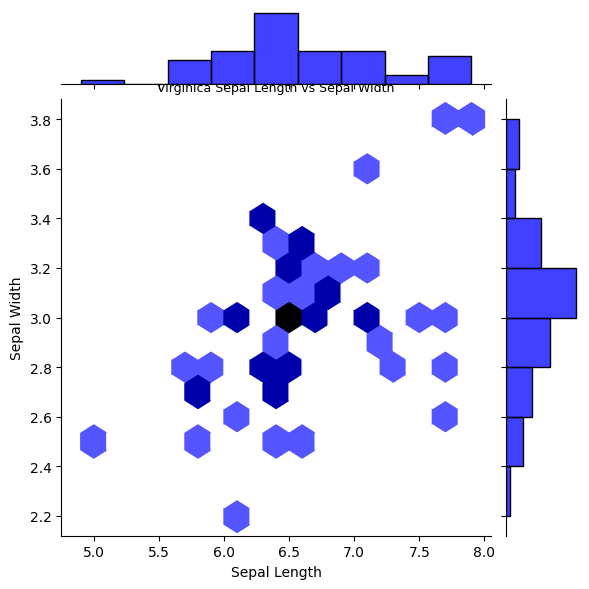

<Figure size 400x300 with 0 Axes>

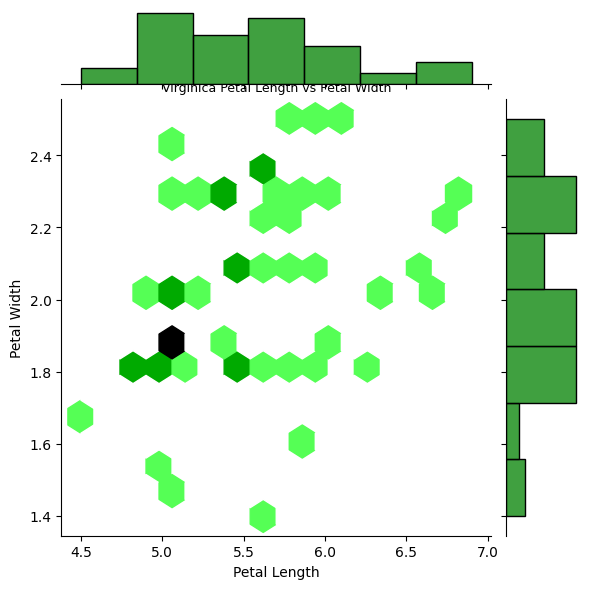

In [73]:
# 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

# 绘制六角箱图 - Setosa
plt.figure(figsize=(4, 3))  # 设置图形大小
plot1 = sns.jointplot(x="sepal_length", y="sepal_width", kind='hex', data=data[data['species']=='setosa'], gridsize=15, color='blue')
plot1.set_axis_labels("Sepal Length", "Sepal Width")
plt.show()

# 绘制六角箱图
plt.figure(figsize=(4, 3))  # 设置图形大小
plot2 = sns.jointplot(x="petal_length", y="petal_width", kind='hex', data=data[data['species']=='setosa'], gridsize=15, color='green')
plot2.set_axis_labels("Petal Length", "Petal Width")
plt.show()

# 绘制六角箱图 - Versicolor
plt.figure(figsize=(4, 3))  # 设置图形大小
plot3 = sns.jointplot(x="sepal_length", y="sepal_width", kind='hex', data=data[data['species']=='versicolor'], gridsize=15, color='blue')
plot3.set_axis_labels("Sepal Length", "Sepal Width")
plt.title("Versicolor Sepal Length vs Sepal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制六角箱图
plt.figure(figsize=(4, 3))  # 设置图形大小
plot4 = sns.jointplot(x="petal_length", y="petal_width", kind='hex', data=data[data['species']=='versicolor'], gridsize=15, color='green')
plot4.set_axis_labels("Petal Length", "Petal Width")
plt.title("Versicolor Petal Length vs Petal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制六角箱图 - Virginica
plt.figure(figsize=(4, 3))  # 设置图形大小
plot5 = sns.jointplot(x="sepal_length", y="sepal_width", kind='hex', data=data[data['species']=='virginica'], gridsize=15, color='blue')
plot5.set_axis_labels("Sepal Length", "Sepal Width")
plt.title("Virginica Sepal Length vs Sepal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制六角箱图
plt.figure(figsize=(4, 3))  # 设置图形大小
plot6 = sns.jointplot(x="petal_length", y="petal_width", kind='hex', data=data[data['species']=='virginica'], gridsize=15, color='green')
plot6.set_axis_labels("Petal Length", "Petal Width")
plt.title("Virginica Petal Length vs Petal Width", fontdict={'fontsize': 9})
plt.show()


<Figure size 800x600 with 0 Axes>

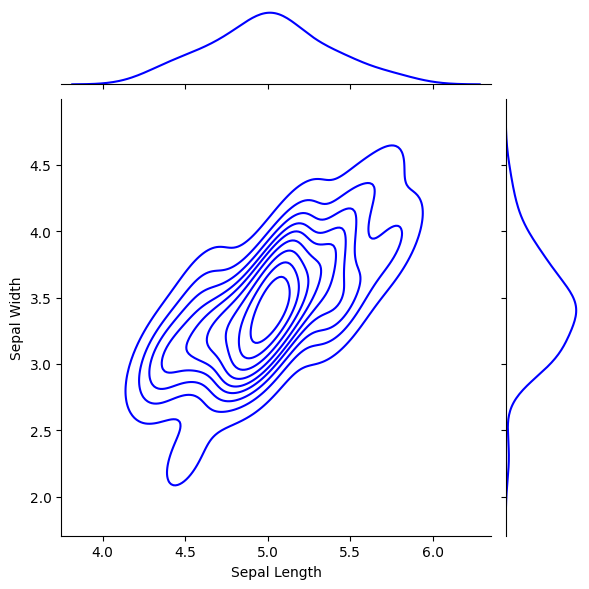

<Figure size 800x600 with 0 Axes>

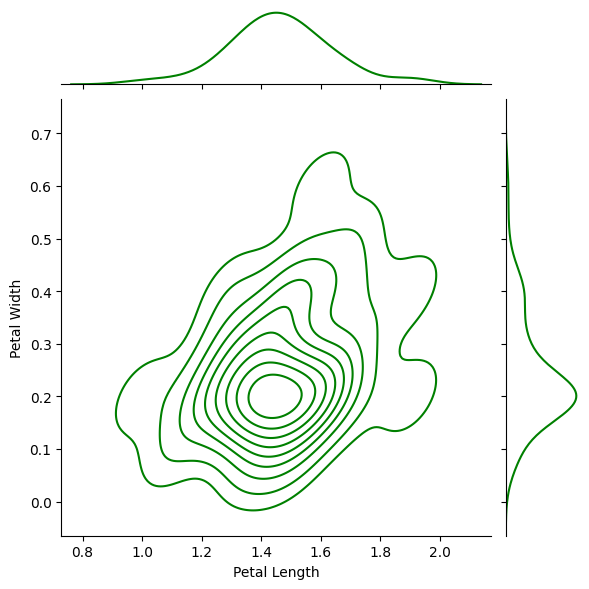

<Figure size 800x600 with 0 Axes>

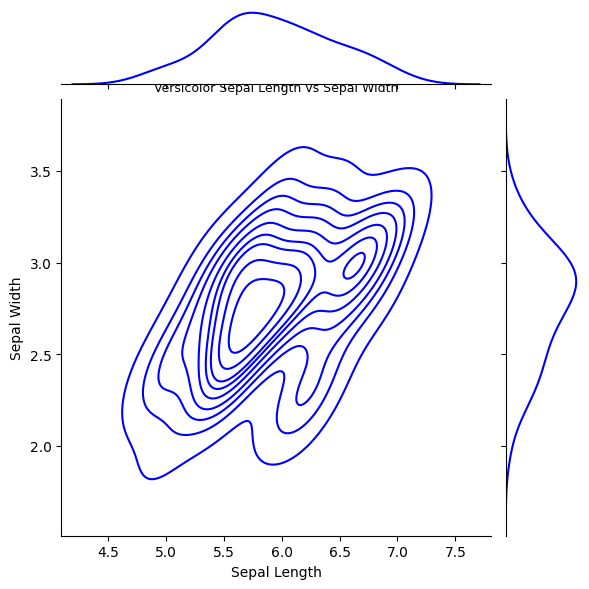

<Figure size 800x600 with 0 Axes>

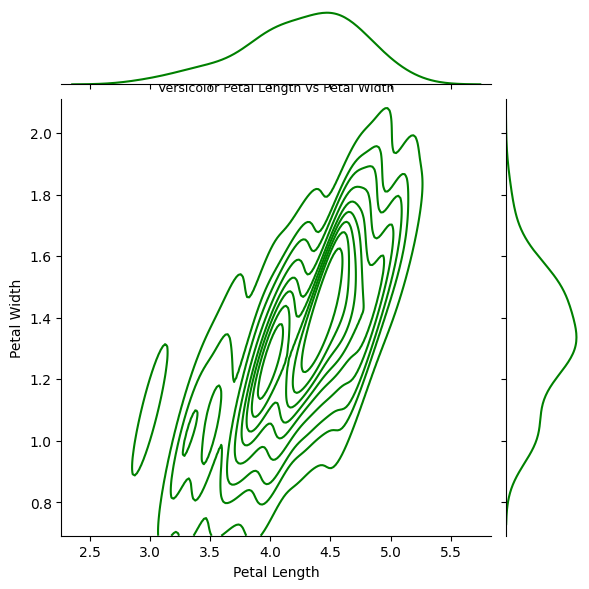

<Figure size 800x600 with 0 Axes>

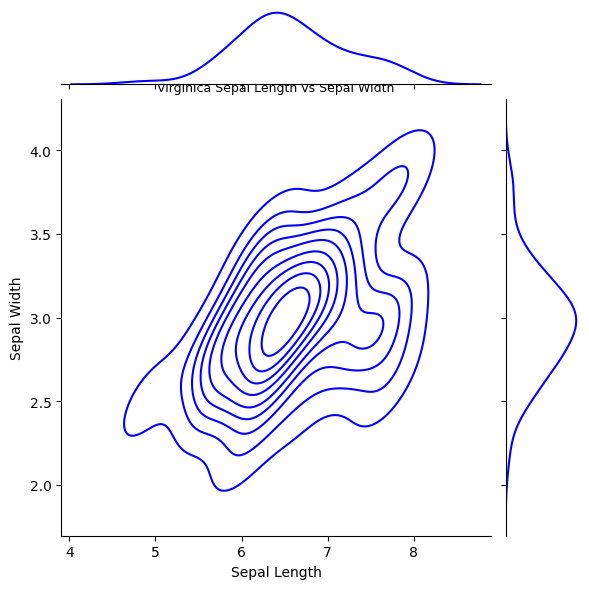

<Figure size 800x600 with 0 Axes>

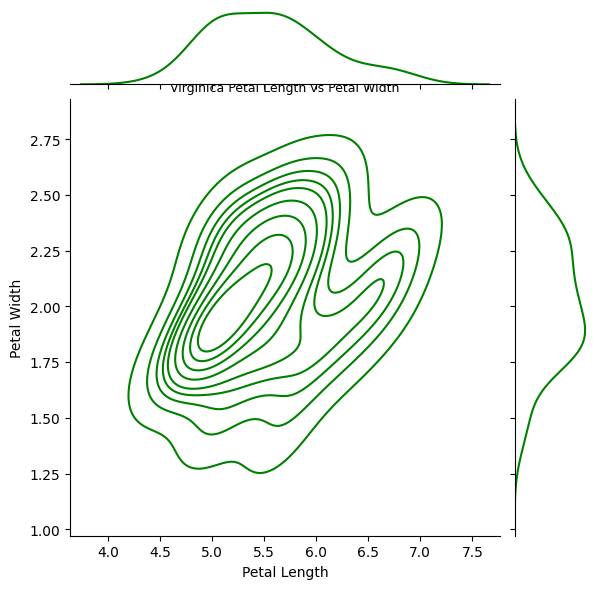

In [71]:

# 绘制核密度估计 - Setosa
plt.figure(figsize=(8, 6))  # 设置图形大小
plot1 = sns.jointplot(x="sepal_length", y="sepal_width", kind='kde', data=data[data['species']=='setosa'], color='blue')
plot1.set_axis_labels("Sepal Length", "Sepal Width")
plt.show()

# 绘制核密度估计
plt.figure(figsize=(8, 6))  # 设置图形大小
plot2 = sns.jointplot(x="petal_length", y="petal_width", kind='kde', data=data[data['species']=='setosa'], color='green')
plot2.set_axis_labels("Petal Length", "Petal Width")
plt.show()

# 绘制核密度估计 - Versicolor
plt.figure(figsize=(8, 6))  # 设置图形大小
plot3 = sns.jointplot(x="sepal_length", y="sepal_width", kind='kde', data=data[data['species']=='versicolor'], color='blue')
plot3.set_axis_labels("Sepal Length", "Sepal Width")
plt.title("Versicolor Sepal Length vs Sepal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制核密度估计
plt.figure(figsize=(8, 6))  # 设置图形大小
plot4 = sns.jointplot(x="petal_length", y="petal_width", kind='kde', data=data[data['species']=='versicolor'], color='green')
plot4.set_axis_labels("Petal Length", "Petal Width")
plt.title("Versicolor Petal Length vs Petal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制核密度估计 - Virginica
plt.figure(figsize=(8, 6))  # 设置图形大小
plot5 = sns.jointplot(x="sepal_length", y="sepal_width", kind='kde', data=data[data['species']=='virginica'], color='blue')
plot5.set_axis_labels("Sepal Length", "Sepal Width")
plt.title("Virginica Sepal Length vs Sepal Width", fontdict={'fontsize': 9})
plt.show()

# 绘制核密度估计
plt.figure(figsize=(8, 6))  # 设置图形大小
plot6 = sns.jointplot(x="petal_length", y="petal_width", kind='kde', data=data[data['species']=='virginica'], color='green')
plot6.set_axis_labels("Petal Length", "Petal Width")
plt.title("Virginica Petal Length vs Petal Width", fontdict={'fontsize': 9})
plt.show()



## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [9]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


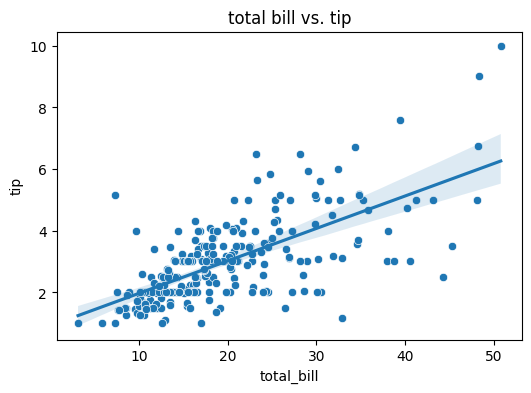

In [10]:
# 1. 小费和总消费之间的关系（提示：散点图+回归分析）

# 设置图形大小
plt.figure(figsize=(6, 4))
# 创建散点图和回归分析
sns.scatterplot(x="total_bill", y="tip", data=data) # 散点图
sns.regplot(x="total_bill", y="tip", data=data, scatter=False)   # 添加回归线，scatter=False 防止再次绘制散点

# 添加标题
plt.title("total bill vs. tip")

# 显示图形
plt.show()

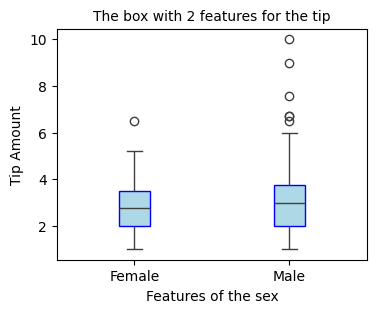

In [11]:
# 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

import seaborn as sns
import matplotlib.pyplot as plt
# 加载 "tips" 数据集
data = sns.load_dataset("tips")

# 设置图形大小
plt.figure(figsize=(4, 3))
# 按照女性和男性的顺序画图
order = ["Female", "Male"]
# 创建箱图比较男性和女性顾客的小费情况
sns.boxplot(x="sex", y="tip", data=data, order=["Female", "Male"], boxprops=dict(facecolor="lightblue", edgecolor="blue"), width=0.2)

# 添加标题和标签
plt.title("The box with 2 features for the tip", fontsize=10)
plt.xlabel("Features of the sex",)
plt.ylabel("Tip Amount", )
# 显示图形
plt.show()


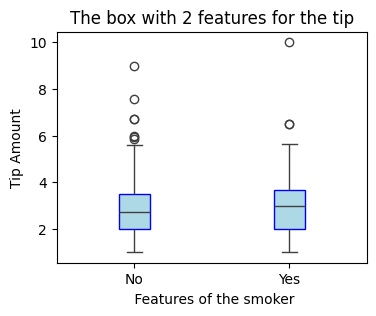

In [12]:
# 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

import seaborn as sns
import matplotlib.pyplot as plt

# 加载 "tips" 数据集
data = sns.load_dataset("tips")

# 设置图形大小
plt.figure(figsize=(4, 3))

# 创建箱图比较抽烟和非抽烟顾客的小费情况，指定箱子样式和宽度
sns.boxplot(x="smoker", y="tip", data=data, order=["No","Yes" ], boxprops=dict(facecolor="lightblue", edgecolor="blue"), width=0.2)

# 添加标题和标签
plt.title("The box with 2 features for the tip")
plt.xlabel(" Features of the smoker")
plt.ylabel("Tip Amount")

# 显示图形
plt.show()


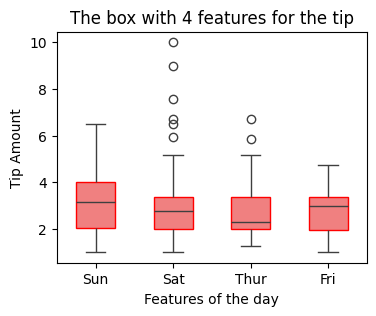

In [13]:
# 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）


# 设置图形大小
plt.figure(figsize=(4, 3))

# 创建箱图比较工作日和周末顾客的小费情况，指定箱子样式和宽度
sns.boxplot(x="day", y="tip", data=data, order=["Sun", "Sat","Thur", "Fri", ], boxprops=dict(facecolor="lightcoral", edgecolor="red"), width=0.5)

# 添加标题和标签
plt.title("The box with 4 features for the tip")
plt.xlabel("Features of the day")
plt.ylabel("Tip Amount")

# 显示图形
plt.show()


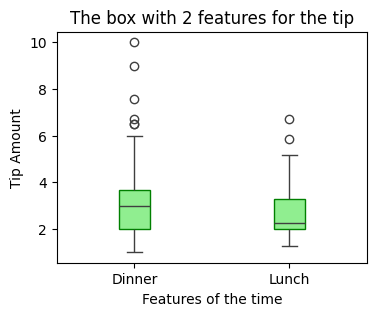

In [14]:
# 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

# 设置图形大小
plt.figure(figsize=(4, 3))

# 创建箱图比较午餐和晚餐顾客的小费情况，指定箱子样式和宽度
sns.boxplot(x="time", y="tip", data=data, order=["Dinner","Lunch",], boxprops=dict(facecolor="lightgreen", edgecolor="green"), width=0.2)

# 添加标题和标签
plt.title("The box with 2 features for the tip")
plt.xlabel("Features of the time")
plt.ylabel("Tip Amount")

# 显示图形
plt.show()


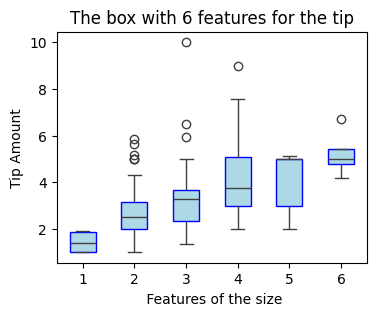

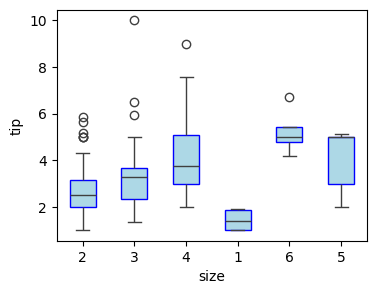

In [15]:
# 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

# 设置图形大小
plt.figure(figsize=(4, 3))
# 创建箱图比较就餐人数对慷慨度的影响，指定箱子样式和宽度
sns.boxplot(x="size", y="tip", data=data, boxprops=dict(facecolor="lightblue", edgecolor="blue"), width=0.5)
# 添加标题和标签
plt.title("The box with 6 features for the tip")
plt.xlabel(" Features of the size")
plt.ylabel("Tip Amount")
# 显示图形
plt.show()


# 横坐标修改顺序
plt.figure(figsize=(4, 3))
sns.boxplot(x="size", y="tip", data=data, order=["2","3","4","1","6","5"],boxprops=dict(facecolor="lightblue", edgecolor="blue"), width=0.5)
# 显示图形
plt.show()


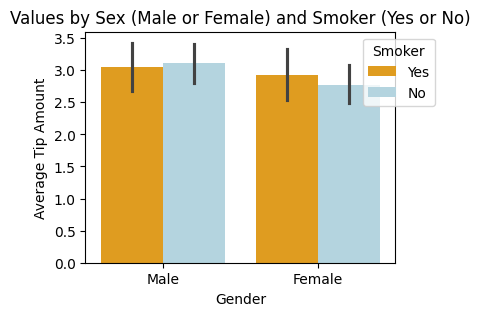

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


In [16]:
# 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

# 设置图形大小
plt.figure(figsize=(4, 3))

# 创建统计柱状图比较性别和抽烟组合因素对慷慨度的影响
sns.barplot(x="sex", y="tip", hue="smoker", data=data,palette={"No": "lightblue", "Yes": "orange"})

# 添加标题和标签
plt.title("Values by Sex (Male or Female) and Smoker (Yes or No)",)
plt.xlabel("Gender")
plt.ylabel("Average Tip Amount")
# 移动图例到右上角并设置字体大小
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='medium', title='Smoker')

# 显示图形
plt.show()



# 计算 "smoker" 与 "sex" 组合的平均小费
average_tip = data.groupby(['sex', 'smoker'], observed=False)['tip'].mean().unstack()
# 打印输出数据
print(average_tip)

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [17]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


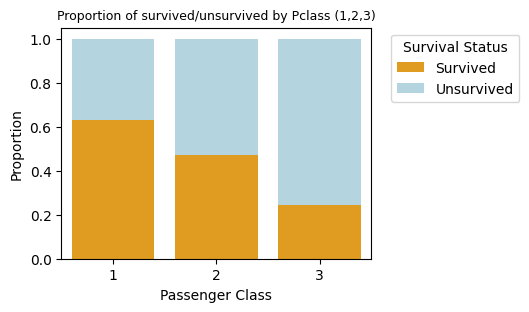

        sum  count  total  survived_prop  unsurvived_prop
pclass                                                   
1       136    216    216       0.629630         0.370370
2        87    184    184       0.472826         0.527174
3       119    491    491       0.242363         0.757637


In [18]:
# 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

# 计算各仓位等级中的生存和遇难人数及比例
result = data.groupby('pclass')['survived'].agg(['sum', 'count'])
result['total'] = result['count']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = 1 - result['survived_prop']

# 设置图形大小
plt.figure(figsize=(4, 3))
# 使用条形图显示处理后的数据
sns.barplot(x=result.index, y='survived_prop', data=result, color='orange', label='Survived')
sns.barplot(x=result.index, y='unsurvived_prop', data=result, color='lightblue', bottom=result['survived_prop'], label='Unsurvived')

# 添加标题和标签
plt.title("Proportion of survived/unsurvived by Pclass (1,2,3)", fontdict={'fontsize': 9})
plt.xlabel("Passenger Class")
plt.ylabel("Proportion")
# 移动图例到右上角外部并设置字体大小
plt.legend(title="Survival Status", loc='upper right', bbox_to_anchor=(1.5, 1), fontsize='medium')
# 显示图形
plt.show()

# 打印输出透视后的数据
print(result)


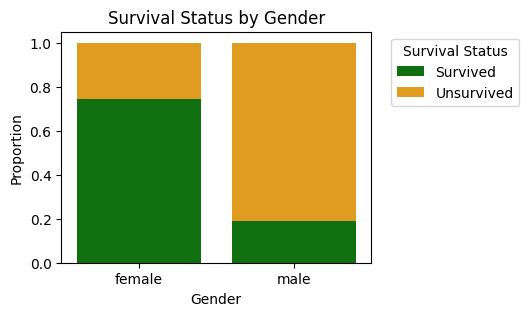

In [19]:
# 2. 不同性别的幸存比例（提示：箱图或者提琴图）


# 计算各性别中的生存和遇难人数及比例
result = data.groupby('sex')['survived'].agg(['sum', 'count'])
result['total'] = result['count']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = 1 - result['survived_prop']
# 设置图形大小
plt.figure(figsize=(4, 3))
# 使用条形图显示处理后的数据
sns.barplot(x=result.index, y='survived_prop', data=result, color='green', label='Survived')
sns.barplot(x=result.index, y='unsurvived_prop', data=result, color='orange', bottom=result['survived_prop'], label='Unsurvived')

# 添加标题和标签
plt.title("Survival Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
# 移动图例到右上角外部并设置字体大小
plt.legend(title="Survival Status", loc='upper right', bbox_to_anchor=(1.5, 1), fontsize='medium')

# 显示图形
plt.show()



/tmp/ipykernel_701/2587872723.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="fare", data=data, palette=["orange", "green"], width=0.2)


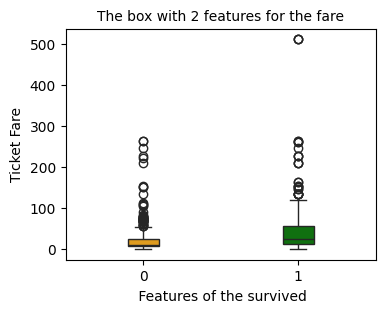

In [20]:
# 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

# 加载 "titanic" 数据集
data = sns.load_dataset("titanic")

# 设置图形大小
plt.figure(figsize=(4, 3))

# 绘制箱图
sns.boxplot(x="survived", y="fare", data=data, palette=["orange", "green"], width=0.2)

# 添加标题和标签
plt.title("The box with 2 features for the fare", fontdict={'fontsize': 10})
plt.xlabel(" Features of the survived")
plt.ylabel("Ticket Fare")

# 显示图形
plt.show()


/tmp/ipykernel_701/1649360467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="age", data=data, palette=["red", "orange"], width=0.2)


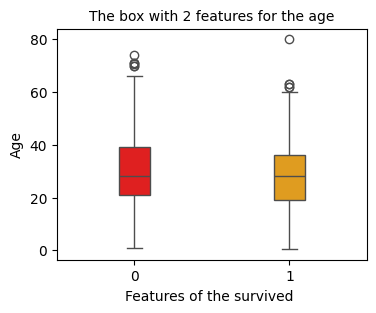

In [21]:
# 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

# 设置图形大小
plt.figure(figsize=(4, 3))
# 绘制箱图，并设置箱子宽度
sns.boxplot(x="survived", y="age", data=data, palette=["red", "orange"], width=0.2)

# 添加标题和标签
plt.title("The box with 2 features for the age", fontdict={'fontsize': 10})
plt.xlabel("Features of the survived ")
plt.ylabel("Age")
# 显示图形
plt.show()



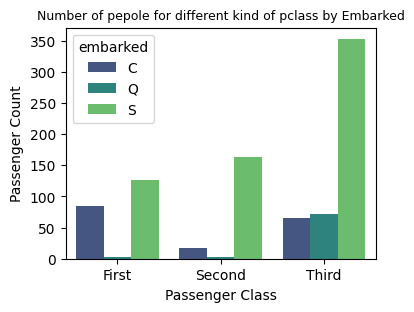

class       1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


In [22]:
# 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

# 设置图形大小
plt.figure(figsize=(4, 3))
# 绘制柱状图
sns.countplot(x="class", hue="embarked", data=data, palette="viridis", hue_order=['C', 'Q', 'S'])
# 替换 class 列的值为数字
data['class'] = data['class'].replace({'First': 1, 'Second': 2, 'Third': 3})

# 添加标题和标签
plt.title("Number of pepole for different kind of pclass by Embarked", fontdict={'fontsize': 9})
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
# 显示图形
plt.show()


# 使用 pivot_table 将数据透视为你所希望的形式
result_pivot = pd.pivot_table(data, values='survived', index='embarked', columns='class', aggfunc='count')
# 打印输出透视后的数据
print(result_pivot)

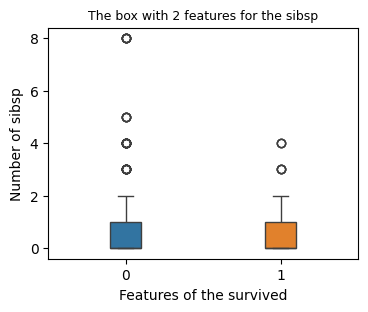

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


In [23]:
# 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

# 设置图形大小
plt.figure(figsize=(4, 3))

# 绘制箱图
# sns.boxplot(x="survived", y="sibsp", data=data, palette=("tab10"),width=0.2)
sns.boxplot(x="survived", y="sibsp", data=data, hue="survived", palette="tab10", width=0.2, legend=False)

# 添加标题和标签
plt.title("The box with 2 features for the sibsp", fontdict={'fontsize': 9})
plt.xlabel("Features of the survived")
plt.ylabel("Number of sibsp")

# 显示图形
plt.show()

# 打印输出堂兄弟姐妹数量的计数信息
sibsp_counts = data['sibsp'].value_counts().sort_index()
print(sibsp_counts)

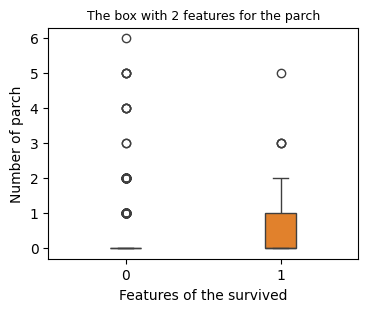

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


In [24]:
# 7. 幸存和遇难乘客父母子女的数量分布

# 设置图形大小
plt.figure(figsize=(4, 3))

# 绘制箱图
sns.boxplot(x="survived", y="parch", data=data,hue="survived", palette="tab10", width=0.2, legend=False)

# 添加标题和标签
plt.title("The box with 2 features for the parch", fontdict={'fontsize': 9})
plt.xlabel("Features of the survived")
plt.ylabel("Number of parch")
# 显示图形
plt.show()


# 显示父母子女数量的计数信息
parch_counts = data['parch'].value_counts().sort_index()
print(parch_counts)

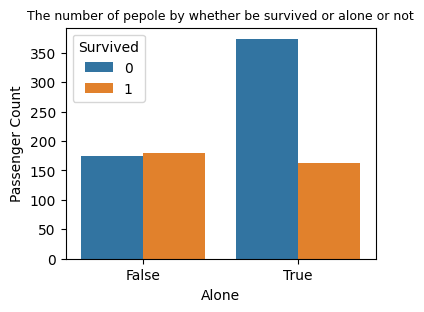

survived    0    1
alone             
False     175  179
True      374  163


In [25]:
# 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

# 设置图形大小
plt.figure(figsize=(4, 3))
# 绘制统计柱状图
sns.countplot(x="alone", hue="survived", data=data, palette="tab10")

# 添加标题和标签
plt.title("The number of pepole by whether be survived or alone or not", fontdict={'fontsize': 9})
plt.xlabel("Alone")
plt.ylabel("Passenger Count")
# 调整 hue 标签位置
plt.legend(title="Survived", bbox_to_anchor=(0, 1), loc="upper left")
# 显示图形
plt.show()


# 使用 crosstab 创建二维表格
table = pd.crosstab(data['alone'], data['survived'], margins=False, margins_name="Total")
# 打印输出
print(table)